<a href="https://colab.research.google.com/github/Phantom-Ren/PR_TH/blob/master/BP%26CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

# 模式识别·第八次作业·BP&CNN

#### 纪泽西 17375338

#### Last Modified:10th,May,2020

</center>

<table align="center">
  <td align="center"><a target="_blank" href="https://colab.research.google.com/github/Phantom-Ren/PR_TH/blob/master/BP&CNN.ipynb"> 
        <img src="http://introtodeeplearning.com/images/colab/colab.png?v2.0"  style="padding-bottom:5px;" /><br>Run in Google Colab</a></td>
</table>


## Part1: 导入库文件及数据集

#### 如需在其他环境运行需改变数据集所在路径

In [31]:
%tensorflow_version 2.x
import tensorflow as tf
import sklearn
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.utils import plot_model
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score


import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from time import *

import os
import scipy.io as sio

%cd /content/drive/My Drive/Pattern Recognition/Dataset/cell_dataset

/content/drive/My Drive/Pattern Recognition/Dataset/cell_dataset


In [0]:
x_train = np.load("x_train.npy")
y_train = np.load("y_train.npy")
x_test = np.load("x_test.npy")
y_test = np.load("y_test.npy")
x_train = x_train/255.0
x_test = x_test/255.0

In [44]:
print(x_train.shape,x_test.shape)
print(np.unique(y_test))
print(np.bincount(y_test.astype(int)))

(14536, 51, 51) (6229, 51, 51)
[0. 1. 2.]
[ 683 2439 3107]


## Part2:数据预处理

#### 可视化展现数据集特征

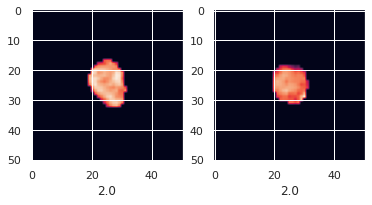

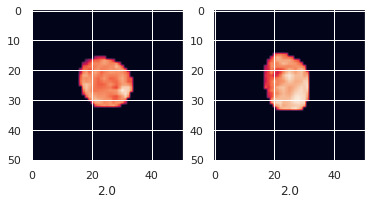

In [46]:
for i in range(10,12):
  plt.subplot(1,2,1)
  plt.imshow(x_test[i,:,:])
  plt.xlabel(y_test[i])
  plt.subplot(1,2,2)
  plt.imshow(x_train[i,:,:])
  plt.xlabel(y_train[i])
  plt.show()

## Part3:模型建立


### 1.CNN
使用Lenet-5 框架 ，之后在 RESNET50V2 , DENSENET121 上进行实验。

In [47]:
model0 = tf.keras.Sequential()

model0.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(51,51,1)))
model0.add(MaxPooling2D(pool_size=(2, 2)))
model0.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
model0.add(MaxPooling2D(pool_size=(2, 2)))
model0.add(Flatten())
model0.add(Dense(120, activation='relu'))
model0.add(Dense(84, activation='relu'))
model0.add(Dense(3, activation='softmax'))

model0.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 47, 47, 6)         156       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 23, 23, 6)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 19, 19, 16)        2416      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 9, 9, 16)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1296)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 120)               155640    
_________________________________________________________________
dense_10 (Dense)             (None, 84)               

In [0]:
plot_model(model0,show_shapes=True, show_layer_names=False)

In [0]:
model0.compile(loss=tf.keras.metrics.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

In [49]:
x_train1 = x_train.reshape(x_train.shape[0], 51, 51, 1)
x_test1 = x_test.reshape(x_test.shape[0], 51, 51, 1)
y_train1=tf.keras.utils.to_categorical(y_train)
y_test1=tf.keras.utils.to_categorical(y_test)
print(x_train1.shape,x_test1.shape)
print(y_train1.shape,y_test1.shape)

(14536, 51, 51, 1) (6229, 51, 51, 1)
(14536, 3) (6229, 3)


In [52]:
model0.fit(x_train1,y_train1,batch_size=128,epochs=10,verbose=1,validation_data=(x_test1,y_test1))

Epoch 1/10
114/114 [==============================] - 22s 189ms/step - loss: 0.5909 - accuracy: 0.7192 - val_loss: 0.5868 - val_accuracy: 0.7287
Epoch 2/10
114/114 [==============================] - 21s 188ms/step - loss: 0.5800 - accuracy: 0.7265 - val_loss: 0.5893 - val_accuracy: 0.7203
Epoch 3/10
114/114 [==============================] - 21s 189ms/step - loss: 0.5822 - accuracy: 0.7229 - val_loss: 0.5969 - val_accuracy: 0.7226
Epoch 4/10
114/114 [==============================] - 22s 190ms/step - loss: 0.5813 - accuracy: 0.7250 - val_loss: 0.5872 - val_accuracy: 0.7245
Epoch 5/10
114/114 [==============================] - 22s 189ms/step - loss: 0.5713 - accuracy: 0.7292 - val_loss: 0.6806 - val_accuracy: 0.6786
Epoch 6/10
114/114 [==============================] - 22s 189ms/step - loss: 0.5784 - accuracy: 0.7255 - val_loss: 0.5841 - val_accuracy: 0.7268
Epoch 7/10
114/114 [==============================] - 22s 189ms/step - loss: 0.5615 - accuracy: 0.7336 - val_loss: 0.5747 - val_ac

### BP神经网络
利用Dense构建

In [54]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(51, 51)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3)
])
model1.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 2601)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)                166528    
_________________________________________________________________
dense_13 (Dense)             (None, 3)                 195       
Total params: 166,723
Trainable params: 166,723
Non-trainable params: 0
_________________________________________________________________


In [55]:
model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model1.fit(x_train, y_train,batch_size=128,epochs=10,verbose=1,validation_data=(x_test,y_test))

Epoch 1/10
114/114 [==============================] - 1s 6ms/step - loss: 0.7132 - accuracy: 0.6554 - val_loss: 0.6983 - val_accuracy: 0.6627
Epoch 2/10
114/114 [==============================] - 1s 5ms/step - loss: 0.6855 - accuracy: 0.6715 - val_loss: 0.6843 - val_accuracy: 0.6744
Epoch 3/10
114/114 [==============================] - 1s 5ms/step - loss: 0.6816 - accuracy: 0.6761 - val_loss: 0.6895 - val_accuracy: 0.6738
Epoch 4/10
114/114 [==============================] - 1s 5ms/step - loss: 0.6765 - accuracy: 0.6763 - val_loss: 0.6782 - val_accuracy: 0.6812
Epoch 5/10
114/114 [==============================] - 1s 5ms/step - loss: 0.6705 - accuracy: 0.6810 - val_loss: 0.6776 - val_accuracy: 0.6797
Epoch 6/10
114/114 [==============================] - 1s 5ms/step - loss: 0.6653 - accuracy: 0.6838 - val_loss: 0.6826 - val_accuracy: 0.6770
Epoch 7/10
114/114 [==============================] - 1s 5ms/step - loss: 0.6613 - accuracy: 0.6853 - val_loss: 0.6773 - val_accuracy: 0.6874
Epoch 

### 总结
通过上述两个实验，获得CNN准确率74%，BP网络准确率70%。学会了CNN/BP神经网络基本架构，将在后续实验中继续实践 RESNET50V2 , DENSENET121 等多种先进CNN网络架构，并尝试使用数据增强方法提高精度。